## Data Challenge 4 - Employee Retention


### Goal
Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).

In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

#### Questions/Hints:
What are the main factors that drive employee churn? Do they make sense? Explain your findings.

What might you be able to do for the company to address employee Churn, what would be follow-up actions?

If you could add to this data set just one variable that could help explain employee churn, what would that be?

Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.

## Findings

* The main factor driving employee churn in this dataset appears to be the position. In particular, Customer Service employees have a noticably higher churn rate than employees in other positions. This makes sense, CS is a rough job that typically doesn't pay well - folks in this position are likely to seek out better paying jobs that tend to be more career-oriented. 

* It seems as though higher salaries might work at keeping Data Scientists and Engineers retained, but perhaps isn't working as a strategy to keep Customer Service, Design, and Marketing employees around as those with higher salaries tend to _not_ be retained. These trends are much more salient for Engineers/Data Scientists, however.

* Company 11 has a big churn problem - with a 75% turnover rate, but they are quite a small company and I don't have any addition information to explain the high churn there. Perhaps they have cultural issues that need to be addressed. 

* There seems to be a distance-decay pattern in the dataset, where most employees tend to stick around for at least one year (i.e. 2015 join employees are staying), while becomes more rare that employees stay for more than 3 years. This is certainly expected. As  a result, intervention efforts could be made to keep employees around at regular intervals but in particular just prior to the one-year, two-year and three-year milestones. 

* Interestingly enough, employees with 4 years of prior experience tend to be retained at a higher rate than they churn, but every other amount of prior experience correlates with a higher churn rate than retention rate. Perhaps this is a 'sweet spot' for the employee knowing what they want in a new company and having enough experience to get hired on at a salary/position that is satisfactory to their career progression going forward. 

* April and May hires tend to churn at a much higher rate than they are retained. Whereas November hires appear to be the only month that has a higher retention rate than churn rate. This would be something that bears additional exploration on a company to company basis. 

* To me, churn is typically related to positions and network connections. As a result, I would want to see a much more nuanced picture of employee positions (i.e. Data Scientist, Senior Data Scientist, the specific role of the Engineer, etc.) as well as information about employee network connectedness within the instituion. This would include things like emails, meeting schedules, participation, etc. - as employees tend to be more isolated, they tend to be at a _much_ higher risk of churning. 

**The table is:**

"employee_retention" - comprehensive information about employees. Columns:

employee_id : id of the employee. Unique by employee per company

company_id : company id.

dept : employee department

seniority : number of yrs of work experience when hired

salary: average yearly salary of the employee during her tenure within the company

join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13

quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

In [165]:
import pandas as pd
import numpy as np

# Bring in some plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

from datetime import datetime

In [166]:
! ls ..

Employee Retention Data Challenge.docx Submissions
README.md                              employee_retention.csv


In [205]:
df = pd.read_csv('../employee_retention.csv', index_col=0)

In [206]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


In [207]:
df.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,3.470200e+04,34702.000000,34702,34702.000000,34463.000000,34702,23510
unique,NaN,NaN,7,NaN,NaN,3124,2008
top,NaN,NaN,temp_contractor,NaN,NaN,2011-11-28,2015-05-08
freq,NaN,NaN,10000,NaN,NaN,76,111
mean,6.466667e+05,4.023370,NaN,10.056625,100280.585004,NaN,NaN
std,3.337653e+05,2.911201,NaN,9.355505,87322.502536,NaN,NaN
min,3.600000e+01,1.000000,NaN,0.000000,5000.000000,NaN,NaN
25%,3.529228e+05,1.000000,NaN,0.000000,9302.000000,NaN,NaN
50%,7.063230e+05,3.000000,NaN,8.000000,88000.000000,NaN,NaN
75%,1.001324e+06,6.000000,NaN,18.000000,158000.000000,NaN,NaN


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [209]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary           239
join_date          0
quit_date      11192
dtype: int64

In [210]:
# Check missing salaries
df.query('salary.isnull()', engine='python').head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
16,488083.0,1,engineer,8,NaN,2011-06-13,2013-06-07
41,259298.0,1,engineer,9,NaN,11.07.2011,2015-10-16
194,699687.0,3,customer_service,3,NaN,2014-10-13,NaN
245,210853.0,7,customer_service,4,NaN,2012-09-10,2013-10-04
310,63729.0,1,marketing,5,NaN,2012-03-19,2013-05-31


In [211]:
# Doesn't seem like too big a deal to drop them
df = df[pd.notnull(df['salary'])].reset_index(drop=True)

In [212]:
df.dept.unique()

array(['temp_contractor', 'design', 'engineer', 'marketing',
       'customer_service', 'data_science', 'sales'], dtype=object)

In [213]:
# Clearly temp_contractors aren't of interest to this analysis and will skew results, need to drop them
df = df[df['dept'] != 'temp_contractor']

In [214]:
# Also, ain't nobody has worked for a company for 99 years, let's drop anything above 30
df = df[df['seniority'] < 30]

In [215]:
# Looks like I'm working with data from 12 companies
df.company_id.unique()

array([ 8,  3,  2,  5,  7, 10,  1,  6,  4,  9, 12, 11])

In [231]:
# Convert join/quit dates to datetime
df.quit_date = pd.to_datetime(df.quit_date)
df.join_date = pd.to_datetime(df.join_date)
df['tenure'] = (df.quit_date - df.join_date).dt.days

In [217]:
# Create binary column - churned or not
df['retained'] = np.where(df['quit_date'].isnull(), 1, 0)

In [232]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,tenure,retained
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304.0,0
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110.0,0
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662.0,0
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,NaN,1
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634.0,0


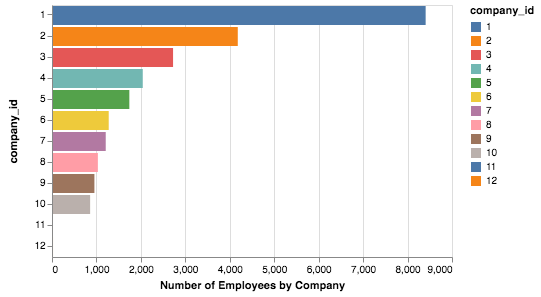

In [219]:
# Taking a look at the companies themeselves - by headcount
source = df.groupby(['company_id']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='company_id:N',
    color='company_id:N',
    x=alt.X('salary', axis=alt.Axis(title='Number of Employees by Company'))
)

Seems there are major imbalances in the size of the companies in the dataset. This really limits the potential of creating meaningful insights across each of the companies because they seem to be structurally different. 

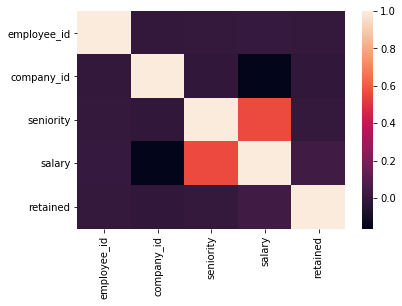

In [220]:
corr = df.corr(method="pearson")
sns.heatmap(corr)

In [221]:
# Check to see if there is a retention problem by department
# Seems like sales, design, and marketing employees are most likely to leave 
# while engineers and data scientists are most likely to stay on at the companies 
# in the dataset 
pd.crosstab(df.retained, df.dept, margins=True, normalize='columns')

dept,customer_service,data_science,design,engineer,marketing,sales,All
retained,,,,,,,
0,0.554847,0.526766,0.563277,0.511821,0.563538,0.571156,0.546871
1,0.445153,0.473234,0.436723,0.488179,0.436462,0.428844,0.453129


In [222]:
# Retention problem by company?
# Company 11 has some serious retention issues - must be a toxic workplace
# edit: looks like company 11 is just really small, only 16 employees in the dataset
# so this trend could just be that it's a startup and maybe employees got burned out
# working long hours
pd.crosstab(df.company_id, df.retained, margins=True, normalize='index')

retained,0,1
company_id,,
1,0.544903,0.455097
2,0.521770,0.478230
3,0.557636,0.442364
4,0.559256,0.440744
5,0.560920,0.439080
6,0.550940,0.449060
7,0.564930,0.435070
8,0.550388,0.449612
9,0.549266,0.450734


In [223]:
# Retention problem by departments within companies?
pd.crosstab([df.dept,df.company_id], df.retained, normalize='index')

retained                            0         1
dept             company_id                    
customer_service 1           0.572387  0.427613
                 2           0.541176  0.458824
                 3           0.538000  0.462000
                 4           0.535761  0.464239
                 5           0.559429  0.440571
                 6           0.519192  0.480808
                 7           0.570815  0.429185
                 8           0.563492  0.436508
                 9           0.545455  0.454545
                 10          0.567568  0.432432
                 11          0.500000  0.500000
                 12          0.636364  0.363636
data_science     1           0.525234  0.474766
                 2           0.471530  0.528470
                 3           0.559420  0.440580
                 4           0.574007  0.425993
                 5           0.530516  0.469484
                 6           0.556291  0.443709
                 7           0.563758  0.436242
                 8           0.545455  0.454545
                 9           0.526316  0.473684
                 10          0.472222  0.527778
                 11          1.000000  0.000000
                 12          0.500000  0.500000
design           1           0.539715  0.460285
                 2           0.565022  0.434978
                 3           0.574468  0.425532
                 4           0.566038  0.433962
                 5           0.654206  0.345794
                 6           0.584416  0.415584
...                               ...       ...
engineer         6           0.527523  0.472477
                 7           0.551570  0.448430
                 8           0.536842  0.463158
                 9           0.562162  0.437838
                 10          0.547059  0.452941
                 11          0.833333  0.166667
                 12          0.250000  0.750000
marketing        1           0.570764  0.429236
                 2           0.543925  0.456075
                 3           0.580381  0.419619
                 4           0.581749  0.418251
                 5           0.508929  0.491071
                 6           0.672414  0.327586
                 7           0.550000  0.450000
                 8           0.507576  0.492424
                 9           0.500000  0.500000
                 10          0.583333  0.416667
                 11          1.000000  0.000000
                 12          0.000000  1.000000
sales            1           0.560953  0.439047
                 2           0.572835  0.427165
                 3           0.565460  0.434540
                 4           0.595238  0.404762
                 5           0.582677  0.417323
                 6           0.527950  0.472050
                 7           0.592593  0.407407
                 8           0.617647  0.382353
                 9           0.557522  0.442478
                 10          0.581818  0.418182
                 12          1.000000  0.000000

[70 rows x 2 columns]

There are definitely some trends here - some companies seem to have serious retention problems, but most hover around a split of 45% retained and 55% churned over the 5 years from 2011 to 2015 that the dataset covers. 

I would use this to make guidelines to specific companies, but that would be missing the forest for the trees since the goal of this exercise is to identify overarching trends given the dataset. 

As a result, I'll turn to the bigger picture and look across the companies. 

In [224]:
# Any trends between retained and churned based on continuous variables?
df.groupby('retained').mean()

,employee_id,company_id,seniority,salary
retained,,,,
0,502080.787695,3.456904,14.128056,135713.089631
1,501110.557380,3.388398,14.121797,141192.259112


From the above, it seems that salary may be playing a role - retained employees tend to have a higher salary. 

In [225]:
# Any noticable trends across departments?
df.groupby(['dept', 'retained']).mean()

employee_id  company_id  seniority         salary
dept             retained                                                     
customer_service 0         496548.985326    3.423161  14.535792   84302.795955
                 1         500265.647553    3.462679  13.710084   79637.419674
data_science     0         494633.325917    3.472038  13.511726  199623.571858
                 1         506152.930388    3.392236  14.951807  215282.463186
design           0         508108.618182    3.444156  14.536364  139637.662338
                 1         490811.011725    3.316583  13.735343  134219.430486
engineer         0         501196.941831    3.589820  13.650128  199013.259196
                 1         505406.098655    3.256502  14.700448  212388.340807
marketing        0         512531.052125    3.361473  14.158640  136856.090652
                 1         488887.166789    3.419166  13.733723  133976.591075
sales            0         512793.965517    3.463849  13.971079  135681.868743
                 1         507898.962222    3.380000  14.045185  136465.925926

It seems like higher salaries might work at keeping Data Scientists and Engineers around, but perhaps isn't working as a strategy to keep Customer Service, Design, and Marketing employees around as those with higher salaries tend to _not_ be retained. When plotting these trends out (see the grouped bar chart below), they don't seem overly sensitive, however, aside from the higher salaries for retained Engineers and Data Scientists. 

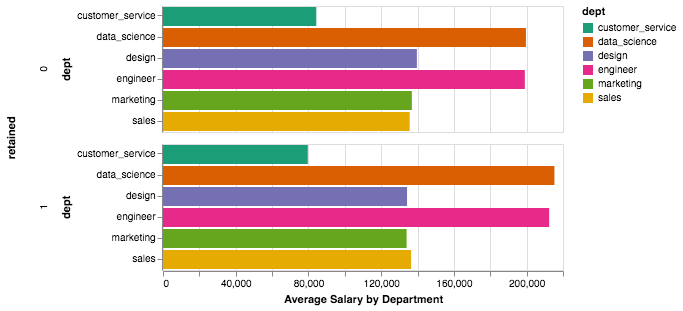

In [226]:
# Grouped bar chart of retention and salary by department
source = df.groupby(['dept', 'retained']).mean().reset_index()

alt.Chart(source).mark_bar().encode(
    y='dept',
    color=alt.Color('dept', scale=alt.Scale(scheme='dark2')),
    x=alt.X('salary', axis=alt.Axis(title='Average Salary by Department')), 
    row='retained'
)

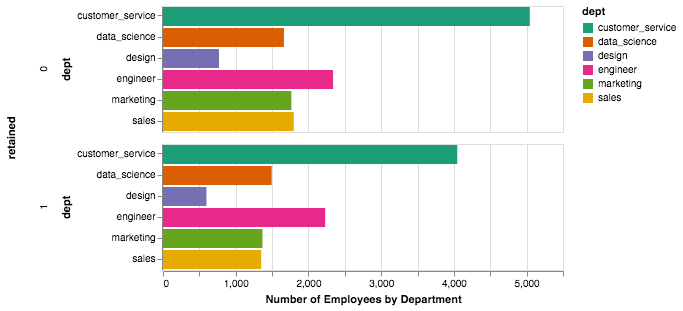

In [227]:
# Grouped bar chart of retention and number of employees by department
source = df.groupby(['dept', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='dept',
    color=alt.Color('dept', scale=alt.Scale(scheme='dark2')),
    x=alt.X('salary', axis=alt.Axis(title='Number of Employees by Department')), 
    row='retained'
)

Looking at the graph above, there is an obvious issue with the number of Customer Service employees who are retained. My intuition suggests that Customer Service must be a stressful job that doesn't tend to pay as well and as a result more individuals in that position are likely to move on to different roles in comparision to the other roles that _tend_ to be more career-oriented. 

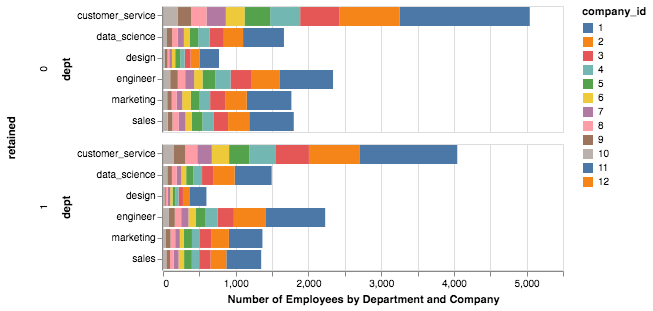

In [228]:
# Do any of the trends above relate to particular companies?
source = df.groupby(['dept', 'company_id', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='dept',
    color='company_id:N',
    x=alt.X('employee_id', axis=alt.Axis(title='Number of Employees by Department and Company')), 
    row='retained'
)

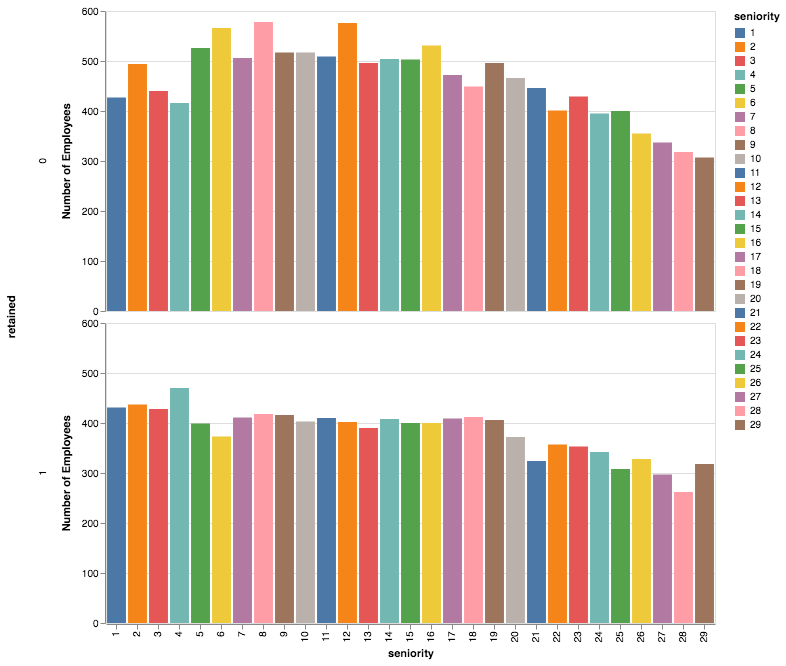

In [230]:
# Does seniority impact retention?
source = df.groupby(['seniority', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    x='seniority:N',
    color='seniority:N',
    y=alt.Y('employee_id', axis=alt.Axis(title='Number of Employees')), 
    row='retained'
)

In [245]:
# Are some trends seasonal? Let's look by month by adding some new features
df['month_of_join'] = df.join_date.dt.month
df['month_of_quit'] = df.quit_date.dt.month

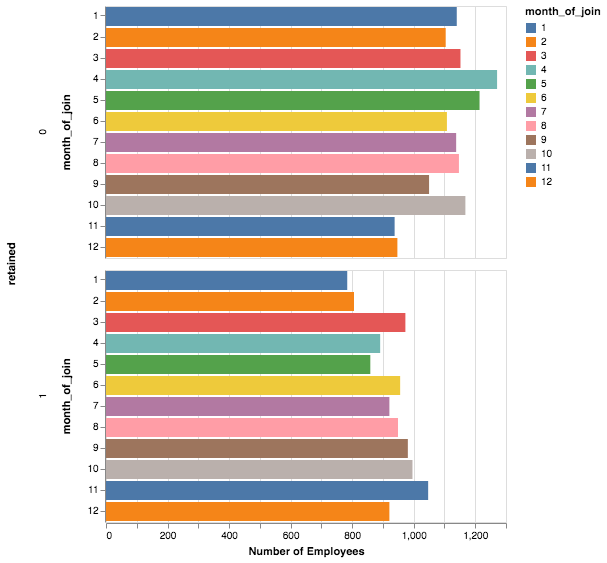

In [257]:
# Does the month an employee joined have any impact on retention?
source = df.groupby(['month_of_join', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='month_of_join:N',
    color='month_of_join:N',
    x=alt.X('employee_id', axis=alt.Axis(title='Number of Employees')), 
    row='retained'
)

The largest deltas above are April and May hires - they tend to churn at a much higher rate than they are retained. Whereas November hires appear to be the only month that has a higher retention rate than churn rate. 

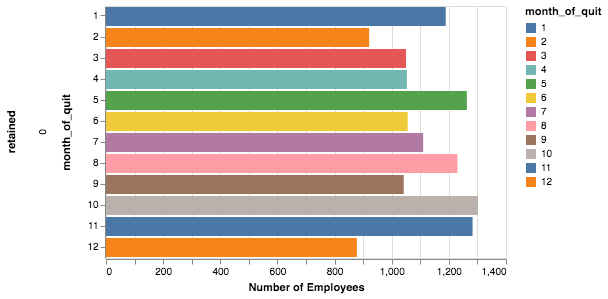

In [250]:
# Do employees tend to leave on certain months?
source = df.groupby(['month_of_quit', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='month_of_quit:N',
    color='month_of_quit:N',
    x=alt.X('employee_id', axis=alt.Axis(title='Number of Employees')), 
    row='retained'
)

Looks like modest peaks in January, May, August, October, and November. The months before these would likely be good times to have company or department enrichment events, expecially in April and September. 

In [251]:
# Are some trends seasonal? Let's look by year by adding some new features
df['year_of_join'] = df.join_date.dt.year
df['year_of_quit'] = df.quit_date.dt.year

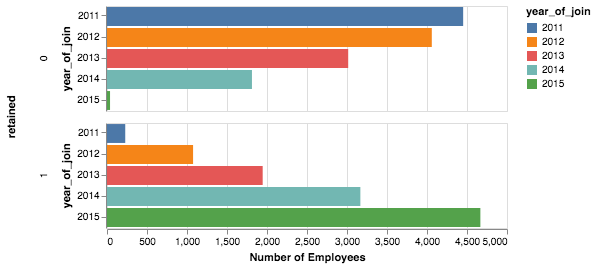

In [255]:
# Does the year an employee joined have any impact on retention?
source = df.groupby(['year_of_join', 'retained']).count().reset_index()

alt.Chart(source).mark_bar().encode(
    y='year_of_join:N',
    color='year_of_join:N',
    x=alt.X('employee_id', axis=alt.Axis(title='Number of Employees')), 
    row='retained'
)

There seems to be a distance-decay pattern here, where most employees tend to stick around for at least one year (i.e. 2015 join employees are staying), while it's rare that employees stay for more than 3 years.  